In [1]:
# 1. Data Exploration

#Data exploration plays an important role in data analytics. In this section we will explain some Python-based tools and methods to explore data. We also need to know how to use different plots to fetch information from data. 


In [2]:
## 1.1 Statistics
'''
1) Compute the following statistics for each component of X and Y: mean, maximum, minimum, 25th percentile, 90th percentile, and standard deviation.

To do this task: 

    1) Read .csv files as a pandas DataFrame
    2) Pandas DataFrame allows you to compute different statistics 
'''


SyntaxError: unmatched ')' (<ipython-input-2-8c5d8dcefe95>, line 3)

In [17]:
import pandas as pd
import numpy as np

# Read X data set into a pandas DataFrame named X
X = pd.read_csv('X.csv')
# Drop the time stamp column
Y = pd.read_csv('Y.csv')
X_D=X.drop("TimeStamp",1)
XY = pd.concat([X_D,Y['DispFrames']], axis=1)
XY_ = pd.concat([X,Y['DispFrames']], axis=1)
#Set the display precision with 2 digits after decimal
pd.set_option("display.precision", 2)
# The most convient way
print(XY.describe(percentiles=[.25,.90]))

       runq-sz  %%memused   proc/s   cswch/s  all_%%usr  ldavg-1   totsck  \
count  3600.00    3600.00  3600.00   3600.00    3600.00  3600.00  3600.00   
mean     52.67      26.22     6.18  43121.73      73.07    60.39   455.19   
std      47.37       6.25     9.06  24722.83      27.70    50.44   181.43   
min       3.00      15.01     0.00   8380.00      17.51     4.60   269.00   
25%      11.00      22.91     0.00  18761.25      45.03    13.39   311.00   
50%      33.00      25.80     0.00  38849.50      93.47    43.99   366.00   
90%     126.00      35.91    19.00  73280.60      98.12   138.59   753.00   
max     199.00      38.99    50.00  85020.00      98.62   186.86   958.00   

        pgfree/s  plist-sz  file-nr   idel/s      tps  DispFrames  
count    3600.00   3600.00  3600.00  3600.00  3600.00     3600.00  
mean    73850.67    802.12  2640.43    45.60     6.25       20.28  
std     28695.80    346.23   196.92   256.02    12.70        4.99  
min     16726.00    452.00  2352.0

In [18]:
print(XY[XY['DispFrames']==0.0]['tps'])
print(XY[XY['tps']==0.0]['DispFrames'])

1347     0.0
1348     0.0
1349    19.0
1350     2.0
Name: tps, dtype: float64
1       13.00
2       13.82
3       16.23
8       16.23
9       15.95
        ...  
3594    12.82
3596    15.05
3597    20.46
3598    24.00
3599    24.00
Name: DispFrames, Length: 2124, dtype: float64


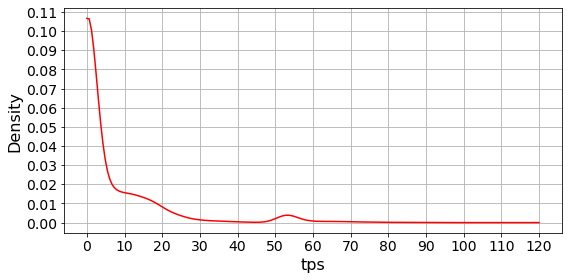

In [19]:
import numpy as np
from matplotlib.pyplot import MultipleLocator

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8, 4))

#X['all_%%usr'].plot.kde(ax=axes,ind=np.linspace(0,120,200),color='r');
X['tps'].plot.kde(ax=axes,ind=np.linspace(0,120,200),color='r');

# Customizing plot (changing font size, labels)
axes.set_xlabel('tps', fontsize=font_size)
axes.set_ylabel('Density', fontsize=font_size)
axes.tick_params(axis='both', which='major', labelsize=font_size-2)
axes.tick_params(axis='both', which='minor', labelsize=font_size-4)

x_major_locator=MultipleLocator(10)
y_major_locator=MultipleLocator(0.01)
ax=plt.gca()
ax.xaxis.set_major_locator(x_major_locator)
ax.yaxis.set_major_locator(y_major_locator)
axes.grid(True)
plt.tight_layout()
plt.savefig(r"\kth course\network analytics\project\pic\1.1.tps.png",dpi=300)

In [20]:
#We can also calculate and print it one by one


#Calculate the required data
X_mean=np.mean(X_D)
X_max=np.max(X_D)
X_min=np.min(X_D)
X_std=np.std(X_D)
X_std_unbiased=np.std(X_D,ddof=1)
X_25p=np.percentile(X_D,25,axis=0)
X_90p=np.percentile(X_D,90,axis=0)

#Print the data 
print("Mean value of Device statistics:")
print(X_mean)
print ("--------------------------------------------------------------------------------------")
print("Maximum value of Device statistics:")
print(X_max)
print ("--------------------------------------------------------------------------------------")
print("Minimum value of Device statistics:")
print(X_min)
print ("--------------------------------------------------------------------------------------")
print("Standard deviation of Device statistics:")
print(X_std)
print ("--------------------------------------------------------------------------------------")
print("Unbiased standard deviation of Device statistics:")
print(X_std_unbiased)
print ("--------------------------------------------------------------------------------------")
print("25th percentile of Device statistics:")
print(X_25p)
print ("--------------------------------------------------------------------------------------")
print("90th percentile of Device statistics:")
print(X_90p)


Mean value of Device statistics:
runq-sz         52.67
%%memused       26.22
proc/s           6.18
cswch/s      43121.73
all_%%usr       73.07
ldavg-1         60.39
totsck         455.19
pgfree/s     73850.67
plist-sz       802.12
file-nr       2640.43
idel/s          45.60
tps              6.25
dtype: float64
--------------------------------------------------------------------------------------
Maximum value of Device statistics:
runq-sz         199.00
%%memused        38.99
proc/s           50.00
cswch/s       85020.00
all_%%usr        98.62
ldavg-1         186.86
totsck          958.00
pgfree/s     442723.00
plist-sz       1772.00
file-nr        3312.00
idel/s         9013.00
tps              90.00
dtype: float64
--------------------------------------------------------------------------------------
Minimum value of Device statistics:
runq-sz          3.00
%%memused       15.01
proc/s           0.00
cswch/s       8380.00
all_%%usr       17.51
ldavg-1          4.60
totsck         269.

In [21]:
'''
2) Compute the following quantity:

    a) The number of observations with CPU utilization ("all_%%usr") smaller than 90% and memory utilization ("%%memused") smaller than 50%;
    b) The average number of used sockets ("totsck") for observations with less than 60000 context switches per seconds ("cswch/s").
'''

'\n2) Compute the following quantity:\n\n    a) The number of observations with CPU utilization ("all_%%usr") smaller than 90% and memory utilization ("%%memused") smaller than 50%;\n    b) The average number of used sockets ("totsck") for observations with less than 60000 context switches per seconds ("cswch/s").\n'

In [22]:
num1 = X[(X['all_%%usr'] < 90) & (X['%%memused'] < 50)]
print("The number of observations with CPU utilization smaller than 90% and memory utilization smaller than 50% is ",num1.shape[0])
num2=X[(X['cswch/s'] < 60000)]["totsck"].mean()
print("The average number of used sockets for observations with less than 60000 context switches per seconds is %.2f"%num2)

The number of observations with CPU utilization smaller than 90% and memory utilization smaller than 50% is  1746
The average number of used sockets for observations with less than 60000 context switches per seconds is 326.14


In [7]:
print(X[X['all_%%usr'] < 90].shape[0])

1746


In [8]:
## 1.2 Data Visualization 

In [9]:
1) Produce the following plots:
    
    a) Time series of memory usage ("%%memused") and CPU utilization ("all_%%usr"), both curves in a single plot. 
    b) Box plot of memory usage ("%%memused") and CPU utilization ("all_%%usr") in a single plot.
    c) Density plots of memory usage ("%%memused") and CPU utilization ("all_%%usr") (two plots).
    d) Histograms of memory usage ("%%memused") and CPU utilization ("all_%%usr") (two plots).

In this task you can use both timestamp and sample index as the X-axis in timeseries plot. We give two examples for both cases. It is preferable to use timestamp.

** Please pay attention to the difference between two plots and how we use them. Customize your plots for your report.**


SyntaxError: unmatched ')' (<ipython-input-9-b5240090fe5d>, line 1)

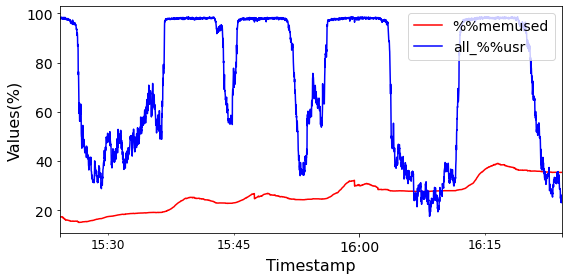

In [48]:
#(a)Time series of memory usage ("%%memused") and CPU utilization ("all_%%usr"), both curves in a single plot.
# Use TimeStamp as index for X, instead of 0,1, ... 
# Convert TimeStamp into date-time format
timeIndex=pd.to_datetime(X['TimeStamp'], unit='s')
X.index=timeIndex

import matplotlib.pyplot as plt

# Generate a figure with one subplot 
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8, 4))

# Produce the plots for specified features sets
memu = X['%%memused'].plot(color='r')
cpuu = X['all_%%usr'].plot(color='b')
#frame= Y['DispFrames'].plot(color='g')

# Customizing plot (changing font size, labels)
font_size = 16
plt.xlabel('Timestamp', fontsize=font_size)
plt.ylabel('Values(%)', fontsize=font_size)
plt.legend(('%%memused','all_%%usr'), loc = 'upper right', shadow=False, fancybox=True, fontsize=font_size-2)
plt.tick_params(axis='both', which='major', labelsize=font_size-2)
plt.tick_params(axis='both', which='minor', labelsize=font_size-4)
plt.tight_layout()

plt.savefig(r"\kth course\network analytics\project\pic\1.3.a.png",dpi=300)
plt.show()

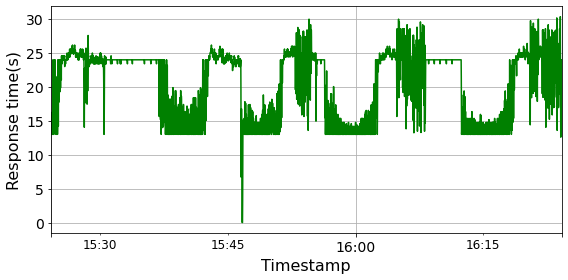

In [11]:
#(a)Time series of memory usage ("%%memused") and CPU utilization ("all_%%usr"), both curves in a single plot.
# Use TimeStamp as index for X, instead of 0,1, ... 
# Convert TimeStamp into date-time format
timeIndex=pd.to_datetime(XY_['TimeStamp'], unit='s')
XY_.index=timeIndex

import matplotlib.pyplot as plt

# Generate a figure with one subplot 
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8, 4))

# Produce the plots for specified features sets
#memu = XY_['%%memused'].plot(color='r')
#cpuu = XY_['all_%%usr'].plot(color='b')
frame= XY_['DispFrames'].plot(color='g')
axes.grid(True)

# Customizing plot (changing font size, labels)
font_size = 16
plt.xlabel('Timestamp', fontsize=font_size)
plt.ylabel('Response time(s)', fontsize=font_size)
#plt.legend(('DispFrames'), loc = 'upper right', shadow=False, fancybox=True, fontsize=font_size-2)
plt.tick_params(axis='both', which='major', labelsize=font_size-2)
plt.tick_params(axis='both', which='minor', labelsize=font_size-4)
plt.tight_layout()
plt.savefig(r"\kth course\network analytics\project\pic\1.3.a1.png",dpi=300)
plt.show()

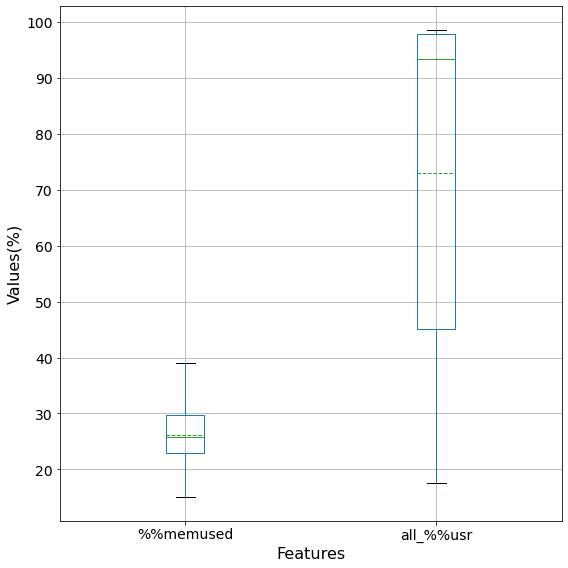

In [12]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8, 8))
mem_cpu = X[['%%memused','all_%%usr']]
bp=mem_cpu.boxplot(meanline=True, showmeans=True)

plt.xlabel('Features', fontsize=font_size)
plt.ylabel('Values(%)', fontsize=font_size)
plt.tick_params(axis='both', which='major', labelsize=font_size-2)
plt.tick_params(axis='both', which='minor', labelsize=font_size-4)
y_major_locator=MultipleLocator(10)
ax=plt.gca()
ax.yaxis.set_major_locator(y_major_locator)

plt.tight_layout()
plt.savefig(r"\kth course\network analytics\project\pic\1.3.b.png",dpi=300)
plt.show()


In [13]:
### Example 4 - Density and histogram plot

###*** To produce a good visualizing comparison, set same values for x axis in both density and histogram plots***

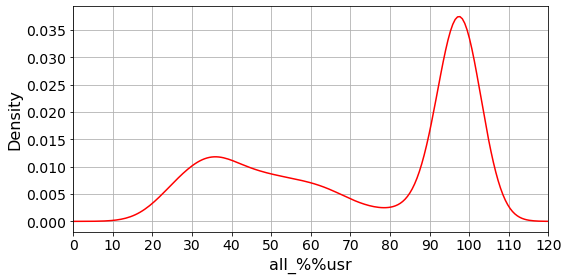

In [43]:
import numpy as np
from matplotlib.pyplot import MultipleLocator

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8, 4))

X['all_%%usr'].plot.kde(ax=axes,ind=np.linspace(0,120,200),color='r');
#X['tps'].plot.kde(ax=axes,ind=np.linspace(0,120,200),color='r');

# Customizing plot (changing font size, labels)
axes.set_xlabel('all_%%usr', fontsize=font_size)
axes.set_ylabel('Density', fontsize=font_size)
axes.tick_params(axis='both', which='major', labelsize=font_size-2)
axes.tick_params(axis='both', which='minor', labelsize=font_size-4)

x_major_locator=MultipleLocator(10)
y_major_locator=MultipleLocator(0.005)
ax=plt.gca()
ax.xaxis.set_major_locator(x_major_locator)
ax.yaxis.set_major_locator(y_major_locator)
axes.grid(True)
plt.xlim([0, 120])
plt.tight_layout()
plt.savefig(r"\kth course\network analytics\project\pic\1.3.c1.png",dpi=300)


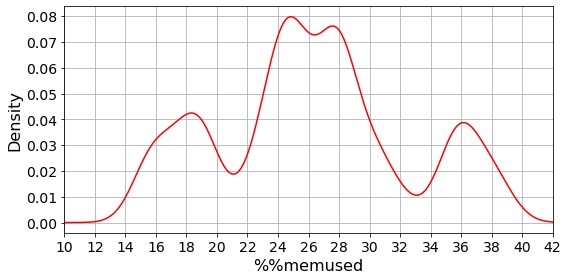

In [39]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8, 4))
X['%%memused'].plot.kde(ax=axes,ind=np.linspace(10,42,200),color='r');
font_size = 16
axes.set_xlabel('%%memused', fontsize=font_size)
axes.set_ylabel('Density', fontsize=font_size)
axes.tick_params(axis='both', which='major', labelsize=font_size-2)
axes.tick_params(axis='both', which='minor', labelsize=font_size-4)
axes.grid(True)

x_major_locator=MultipleLocator(2)
y_major_locator=MultipleLocator(0.01)
ax=plt.gca()
ax.xaxis.set_major_locator(x_major_locator)
ax.yaxis.set_major_locator(y_major_locator)
plt.xlim([10, 42])
plt.tight_layout()
plt.savefig(r"\kth course\network analytics\project\pic\1.3.c2.png",dpi=300)

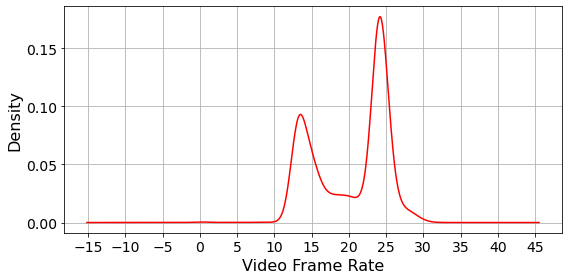

In [40]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8, 4))
XY['DispFrames'].plot.kde(ax=axes,color='r');
font_size = 16
axes.set_xlabel('Video Frame Rate', fontsize=font_size)
axes.set_ylabel('Density', fontsize=font_size)
axes.tick_params(axis='both', which='major', labelsize=font_size-2)
axes.tick_params(axis='both', which='minor', labelsize=font_size-4)
axes.grid(True)

x_major_locator=MultipleLocator(5)
y_major_locator=MultipleLocator(0.05)
ax=plt.gca()
ax.xaxis.set_major_locator(x_major_locator)
ax.yaxis.set_major_locator(y_major_locator)
plt.tight_layout()
plt.savefig(r"\kth course\network analytics\project\pic\2r1.png",dpi=300)

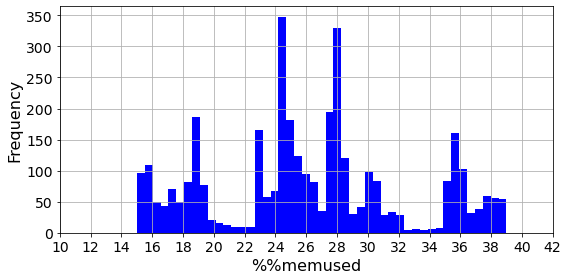

In [35]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8, 4))

# Histogram plot
n_bins0 = int((X['%%memused'].max()-X['%%memused'].min())*2) 
axes.hist(X['%%memused'],bins=n_bins0,color='b')

# Customizing plot (changing font size, labels)
font_size = 16
axes.set_xlabel('%%memused', fontsize=font_size)
axes.set_ylabel('Frequency', fontsize=font_size)
axes.tick_params(axis='both', which='major', labelsize=font_size-2)
axes.tick_params(axis='both', which='minor', labelsize=font_size-4)
axes.grid(True)

x_major_locator=MultipleLocator(2)
y_major_locator=MultipleLocator(50)
ax=plt.gca()
ax.xaxis.set_major_locator(x_major_locator)
ax.yaxis.set_major_locator(y_major_locator)
plt.xlim([10, 42])
plt.tight_layout()
plt.savefig(r"\kth course\network analytics\project\pic\1.3.d1.png",dpi=300)

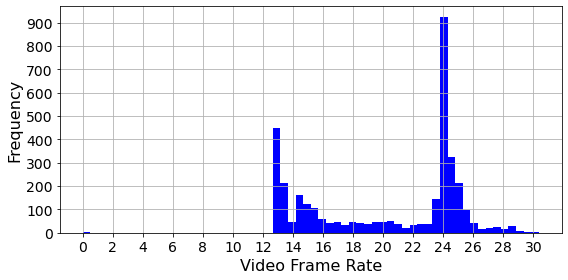

In [36]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8, 4))

# Histogram plot
n_bins0 = int((XY['DispFrames'].max()-XY['DispFrames'].min())*2) 
axes.hist(XY['DispFrames'],bins=n_bins0,color='b')

# Customizing plot (changing font size, labels)
font_size = 16
axes.set_xlabel('Video Frame Rate', fontsize=font_size)
axes.set_ylabel('Frequency', fontsize=font_size)
axes.tick_params(axis='both', which='major', labelsize=font_size-2)
axes.tick_params(axis='both', which='minor', labelsize=font_size-4)
axes.grid(True)

x_major_locator=MultipleLocator(2)
y_major_locator=MultipleLocator(100)
ax=plt.gca()
ax.xaxis.set_major_locator(x_major_locator)
ax.yaxis.set_major_locator(y_major_locator)
plt.tight_layout()
plt.savefig(r"\kth course\network analytics\project\pic\2r2.png",dpi=300)

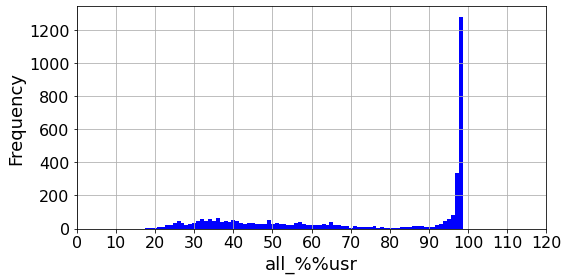

In [45]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8, 4))
n_bins1 = int(X['all_%%usr'].max()-X['all_%%usr'].min()) 
axes.hist(X['all_%%usr'],bins=n_bins1,color='b')

# Customizing plot (changing font size, labels)
font_size = 18
axes.set_xlabel('all_%%usr', fontsize=font_size)
axes.set_ylabel('Frequency', fontsize=font_size)
axes.tick_params(axis='both', which='major', labelsize=font_size-2)
axes.tick_params(axis='both', which='minor', labelsize=font_size-4)
x_major_locator=MultipleLocator(10)
y_major_locator=MultipleLocator(200)
ax=plt.gca()
ax.xaxis.set_major_locator(x_major_locator)
ax.yaxis.set_major_locator(y_major_locator)
plt.xlim([0, 120])
plt.tight_layout()
axes.grid(True)
plt.savefig(r"\kth course\network analytics\project\pic\1.3.d2.png",dpi=300)